In [1]:
import os, ast
import matplotlib.pyplot as plt
import matplotlib as mpt
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib.lines import Line2D
import matplotlib.transforms as mtransforms

In [2]:
%matplotlib inline
mpt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['font.family'] = 'cmr10'

In [3]:
infile = pd.read_csv('../Outputs/Purned_measures_Compratio_Theospeed.csv')
datasets = ['ER', 'WS', 'BA']
Edge_measures = ['FR', 'ORC', 'EBC'] 
Measures = infile.columns[2:].tolist() 
print(Measures, infile.shape)

['Compressionratio', 'Theoreticalspeedup'] (9, 4)


2 [(dict_keys(['ER', 'WS', 'BA']), 3), (dict_keys(['ER', 'WS', 'BA']), 3)]


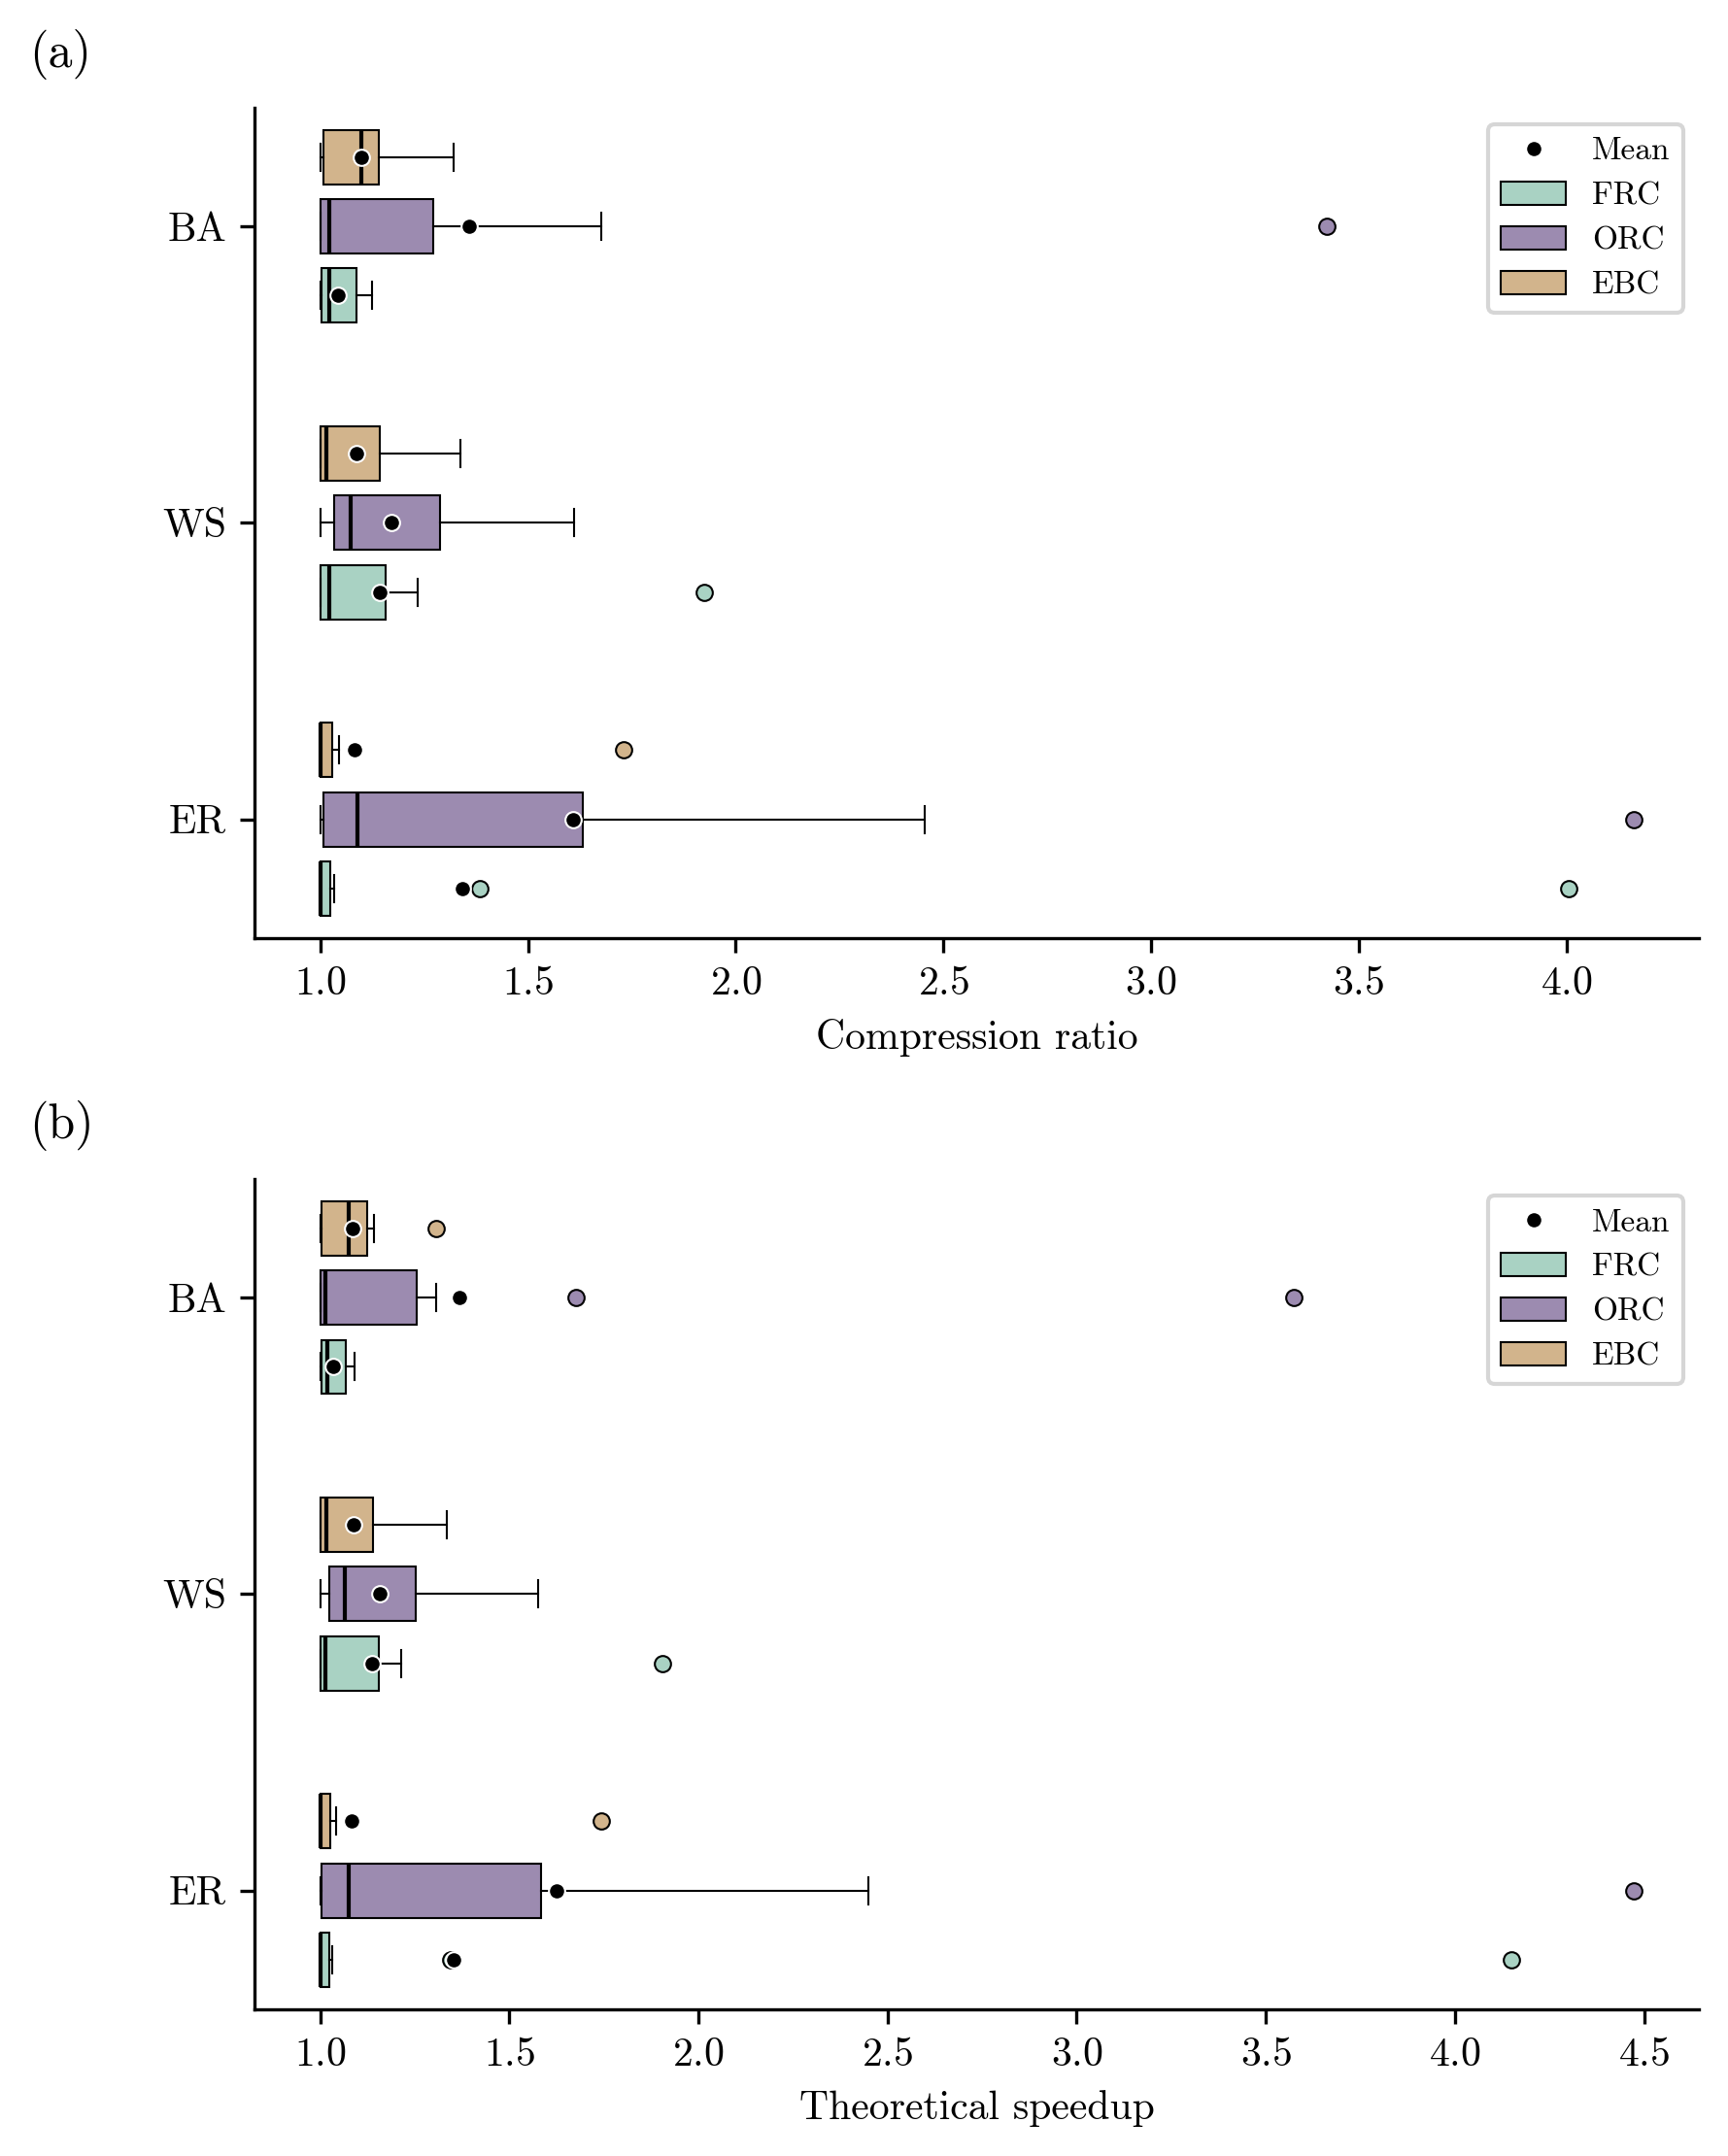

In [4]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(6, 7.5))
axes_flat = axes.flatten()

ALL_data = [{dataset:{edgemeasure: ast.literal_eval(infile.loc[(infile['datasets'] == dataset) & (infile['Edge_measures'] == edgemeasure), measure].values[0]) 
                      for edgemeasure in Edge_measures} for dataset in datasets} for measure in Measures]
print(len(ALL_data), [(v.keys(), len(v.values())) for v in ALL_data])

Titles = ["Compression ratio", "Theoretical speedup"]
labels = ['(a)','(b)']
method_colors = {'FR': '#a9d2c3', 'ORC': '#9c8bb0', 'EBC': 'tan'}
# method_colors = {'FR': 'lightsalmon', 'ORC': 'plum', 'EBC': 'tan'}
Edge_measures
tt = 0
for ax, DataDict, label in zip(axes_flat, ALL_data, labels):    
    all_data = []
    positions = []
    box_colors = []
    for i, dataset in enumerate(datasets):
        center = i * 3  
        offsets = [-0.7, 0, 0.7]   
        for j, measure in enumerate(Edge_measures):
            all_data.append(DataDict[dataset][measure])
            positions.append(center + offsets[j])
            box_colors.append(method_colors[measure])

    bp = ax.boxplot(all_data, vert=False, patch_artist=True, showmeans=True, positions=positions, widths=0.55,
        meanprops=dict(marker='.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0.5, markersize=8, linestyle='none'),
        flierprops=dict(marker='o', markersize=4, markeredgewidth=0.5, linestyle='none'))

    for box_patch, flier, color in zip(bp['boxes'], bp['fliers'], box_colors):
        box_patch.set_facecolor(color)
        box_patch.set_linewidth(0.5)
        flier.set_markerfacecolor(color)
        flier.set_markeredgecolor('black')

    for whisker,cap in zip(bp['whiskers'], bp['caps']):
        whisker.set_linewidth(0.5)
        cap.set_linewidth(0.5)

    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(1)

    ax.set_xlabel(Titles[tt])
    ax.spines[['top','right']].set_visible(False)
    ax.tick_params(axis='x', labelsize=10)

    yticks = [i*3 for i in range(0,len(datasets))]
    ax.set_yticks(yticks)
    ax.set_yticklabels(datasets, fontsize=10)

    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(-0.1, 1, label, transform=ax.transAxes + trans, fontsize=12, va='bottom', weight='bold') #, fontfamily='Arial'

    meanprops = dict(marker='.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0.5, markersize=8, linestyle='none')
    legend_handles = [plt.Rectangle((0,0),1,1, facecolor=method_colors[m], edgecolor='black', linewidth=0.5, label=m.replace('FR', 'FRC')) for m in Edge_measures]
    mean_handle = Line2D([], [], label='Mean', marker=meanprops['marker'],markerfacecolor=meanprops['markerfacecolor'],
                     markeredgecolor=meanprops['markeredgecolor'],markeredgewidth=meanprops['markeredgewidth'],markersize=meanprops['markersize'],
                     linestyle=meanprops['linestyle'])
    legend_handles.insert(0, mean_handle)
    ax.legend(handles=legend_handles, fontsize = 8)
    tt+=1

# plt.suptitle("Comparison of the three classes of RWNNs (Pruned)")
plt.tight_layout()
plt.savefig("../Figures/Pruned_measures.pdf", dpi = 300)
plt.show()